In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

26.446728503209314 -18.921828582703426
-43.60993345627144 21.041301349557017
69.70878868568164 39.44093963006415
79.91481279688085 -42.374819130360095
-65.18354851246298 98.47214759978527
67.52005647829918 90.59614722703589
-48.5859887972515 -29.198242734398093
-81.94608336315639 60.809771828961345
39.703598770778456 66.91552006616303
73.26704216507423 -93.10227124783134
26.32732506048339 152.84165757929776
-0.3612603549115505 -94.8638442859587
-25.524724131560745 178.60118707380087
-46.35094941664573 120.74155052121449
-83.11680068374235 -48.65580652506773
89.07071050234677 -15.535371378369234
-53.959858617968685 -134.17172557536927
-19.762950338914365 162.61532741291995
77.10675993846402 88.84828171322539
-59.486070381199745 95.92530750266548
13.42647756759709 114.07930688095712
51.45925728783635 -7.01617883332284
19.219044045735203 129.6412891935288
31.813530979965222 175.85957911643806
-19.330080015038035 164.52662214885214
-84.8690408000954 116.78354514971437
-14.42461216599753 -1

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an empty list to hold the eather data.
city_data= []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(5)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | los llanos de aridane
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | ostrovnoy
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | svetlogorsk
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | samarkand
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | kaeo
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | poum
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | tuy hoa
Processing Record 21 of Set 1 | dunmore east
Processing Record 22 of Set 1 | hirara
Processing Record 23 of Set 1 

Processing Record 40 of Set 4 | westport
Processing Record 41 of Set 4 | atuona
Processing Record 42 of Set 4 | olafsvik
Processing Record 43 of Set 4 | san juan bautista
Processing Record 44 of Set 4 | tacuarembo
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | sampit
Processing Record 47 of Set 4 | port elizabeth
Processing Record 48 of Set 4 | avera
Processing Record 49 of Set 4 | chapais
Processing Record 50 of Set 4 | thinadhoo
Processing Record 1 of Set 5 | mehamn
Processing Record 2 of Set 5 | sosnovka
Processing Record 3 of Set 5 | rawson
Processing Record 4 of Set 5 | porbandar
Processing Record 5 of Set 5 | berezovyy
Processing Record 6 of Set 5 | noumea
Processing Record 7 of Set 5 | gat
Processing Record 8 of Set 5 | avarua
Processing Record 9 of Set 5 | kijini
Processing Record 10 of Set 5 | beringovskiy
Processing Record 11 of Set 5 | richards bay
Processing Record 12 of Set 5 | aswan
Processing Record 13 of Set 5 | lefka
Processing Record 14 of S

Processing Record 32 of Set 8 | balestrand
Processing Record 33 of Set 8 | siirt
Processing Record 34 of Set 8 | kampot
Processing Record 35 of Set 8 | kimbe
Processing Record 36 of Set 8 | grand centre
City not found. Skipping...
Processing Record 37 of Set 8 | adamovka
Processing Record 38 of Set 8 | nadym
Processing Record 39 of Set 8 | asau
Processing Record 40 of Set 8 | babanusah
City not found. Skipping...
Processing Record 41 of Set 8 | kruisfontein
Processing Record 42 of Set 8 | benjamin constant
Processing Record 43 of Set 8 | gayeri
Processing Record 44 of Set 8 | tilichiki
Processing Record 45 of Set 8 | moose factory
Processing Record 46 of Set 8 | srednekolymsk
Processing Record 47 of Set 8 | san rafael
Processing Record 48 of Set 8 | marzuq
Processing Record 49 of Set 8 | sao felix do xingu
Processing Record 50 of Set 8 | northam
Processing Record 1 of Set 9 | dumas
Processing Record 2 of Set 9 | boa vista
Processing Record 3 of Set 9 | puri
Processing Record 4 of Set 9

City not found. Skipping...
Processing Record 19 of Set 12 | chok chai
Processing Record 20 of Set 12 | jonkoping
Processing Record 21 of Set 12 | baruun-urt
Processing Record 22 of Set 12 | tambacounda
Processing Record 23 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 24 of Set 12 | deputatskiy
Processing Record 25 of Set 12 | ilhabela
Processing Record 26 of Set 12 | masvingo
Processing Record 27 of Set 12 | kaitangata
Processing Record 28 of Set 12 | dhidhdhoo
Processing Record 29 of Set 12 | fjerritslev
Processing Record 30 of Set 12 | linhares
Processing Record 31 of Set 12 | sodertalje
City not found. Skipping...
Processing Record 32 of Set 12 | namatanai
Processing Record 33 of Set 12 | salina cruz
Processing Record 34 of Set 12 | florida
Processing Record 35 of Set 12 | mayskiy
Processing Record 36 of Set 12 | leningradskiy
Processing Record 37 of Set 12 | kudahuvadhoo
Processing Record 38 of Set 12 | krasnozatonskiy
Processing Record 39 of Set 12 | launce

In [27]:
len(city_data)

558

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Los Llanos De Aridane,28.6585,-17.9182,67.75,85,100,10.36,ES,2022-09-29 23:56:36
1,Bredasdorp,-34.5322,20.0403,53.83,97,97,1.95,ZA,2022-09-29 23:56:36
2,Ostrovnoy,68.0531,39.5131,34.54,73,72,10.02,RU,2022-09-29 23:56:36
3,Ilulissat,69.2167,-51.1000,29.91,74,100,4.25,GL,2022-09-29 23:56:37
4,Busselton,-33.6500,115.3333,60.31,67,0,12.15,AU,2022-09-29 23:56:37
5,Svetlogorsk,52.6333,29.7333,51.19,96,100,4.18,BY,2022-09-29 23:56:38
6,Cidreira,-30.1811,-50.2056,60.48,68,99,14.20,BR,2022-09-29 23:56:38
7,Samarkand,39.6542,66.9597,56.62,47,99,6.91,UZ,2022-09-29 23:56:38
8,Thompson,55.7435,-97.8558,53.76,58,75,8.05,CA,2022-09-29 23:52:55
9,Hasaki,35.7333,140.8333,75.29,52,83,9.46,JP,2022-09-29 23:56:39


In [29]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order] 
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Los Llanos De Aridane,ES,2022-09-29 23:56:36,28.6585,-17.9182,67.75,85,100,10.36
1,Bredasdorp,ZA,2022-09-29 23:56:36,-34.5322,20.0403,53.83,97,97,1.95
2,Ostrovnoy,RU,2022-09-29 23:56:36,68.0531,39.5131,34.54,73,72,10.02
3,Ilulissat,GL,2022-09-29 23:56:37,69.2167,-51.1000,29.91,74,100,4.25
4,Busselton,AU,2022-09-29 23:56:37,-33.6500,115.3333,60.31,67,0,12.15
...,...,...,...,...,...,...,...,...,...
553,Kuldur,RU,2022-09-30 00:01:28,49.2167,131.6333,49.44,78,99,5.41
554,Key Largo,US,2022-09-30 00:01:34,25.0865,-80.4473,79.00,80,63,16.13
555,Eregli,TR,2022-09-30 00:01:34,37.5133,34.0467,66.92,52,3,3.83
556,Yining,CN,2022-09-30 00:01:35,29.0361,114.5636,78.91,66,1,1.05


In [31]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file,index_label = "City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

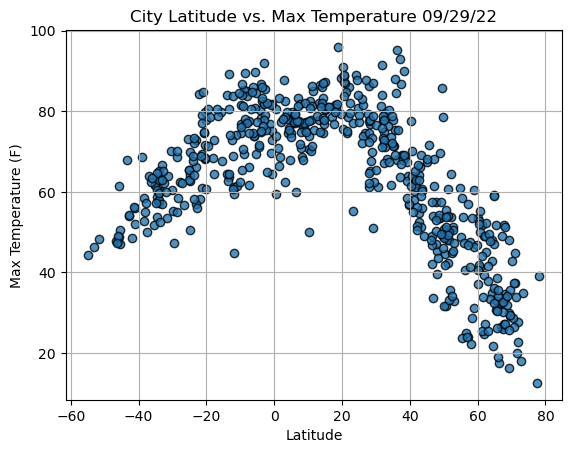

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

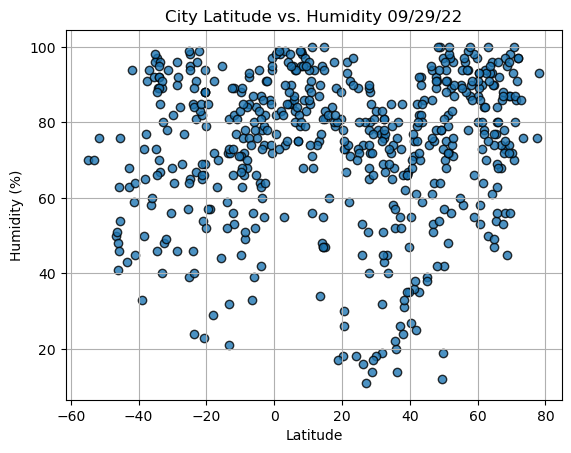

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

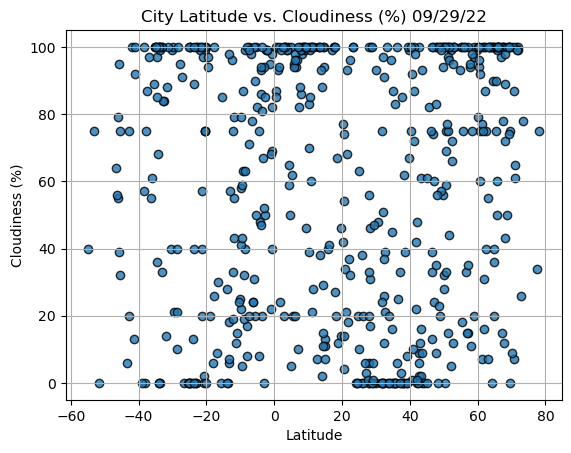

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

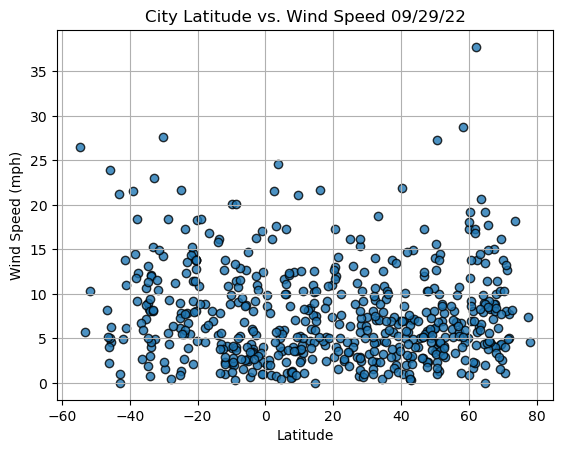

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [38]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [39]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011
